## Objective 1:

1. Identify high-performing movie genres by analyzing their relationship with box office performance.

Minor Objectives:

1. Create a table linking movie ratings, vote counts, and box office revenues.

2. Aggregate vote counts per movie per region to filter out movies with low participation in ratings.

3. Clean and prepare the dataset for meaningful insights.

4. Perform exploratory data analysis (EDA) with visualizations:
- Revenue vs. genres.
- Average ratings vs. genres.
- Distribution of votes across genres.



# 2. Data Preparation/ Cleaning

# Steps to Be Performed:

### Cleaning the Data:

1. Handle Missing Values: Identify and address missing data through imputation, estimation, or removal to maintain dataset integrity.

2. Remove Duplicate Entries: Eliminate redundant rows to ensure each data point is unique and reliable.
3. Ensure Consistent Formats: Convert data into uniform formats for seamless analysis (e.g., standardizing date or numeric representations).

### Integrating and Structuring the Data:

1. Standardize Text: Clean and harmonize textual data by converting to lowercase, trimming whitespace, removing special characters, and resolving inconsistencies.

2. Standardize Columns: Refine column structure by renaming for clarity, aligning data types for consistency, and reordering to enhance usability.

3. Select Key Features: Focus on the most relevant columns to streamline analysis and improve model performance.

4. Feature Engineering: Create new variables or transform existing ones to extract deeper insights and enrich the dataset.


### Merging datasets

1. tn and bom using title, left merge
2. imdb and tmdb using original_title, inner merge
3. rt and rt_review using id, inner merge
4. inspect unmatched rows after merging

In [251]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3

Connecting to Database

In [252]:
conn=sqlite3.connect('/content/im.db')


In [253]:
# from google.colab import files
# files.download('/content/im.db')


List all tables in the database:

In [254]:
pd.read_sql("""SELECT name FROM sqlite_master WHERE type='table';""",conn)


,name
0,movie_basics
1,directors
2,known_for
3,movie_akas
4,movie_ratings
5,persons
6,principals
7,writers


###Inspect the relevant tables

In [255]:
pd.read_sql("""select * from movie_ratings;""",conn)

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21
...,...,...,...
73851,tt9805820,8.1,25
73852,tt9844256,7.5,24
73853,tt9851050,4.7,14
73854,tt9886934,7.0,5


In [256]:
pd.read_sql("""select * from movie_basics;""",conn)

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,None


In [257]:
pd.read_sql("""select * from movie_akas;""",conn)

,movie_id,ordering,title,region,language,types,attributes,is_original_title
0,tt0369610,10,Джурасик свят,BG,bg,None,None,0.0
1,tt0369610,11,Jurashikku warudo,JP,None,imdbDisplay,None,0.0
2,tt0369610,12,Jurassic World: O Mundo dos Dinossauros,BR,None,imdbDisplay,None,0.0
3,tt0369610,13,O Mundo dos Dinossauros,BR,None,None,short title,0.0
4,tt0369610,14,Jurassic World,FR,None,imdbDisplay,None,0.0
...,...,...,...,...,...,...,...,...
331698,tt9827784,2,Sayonara kuchibiru,None,None,original,None,1.0
331699,tt9827784,3,Farewell Song,XWW,en,imdbDisplay,None,0.0
331700,tt9880178,1,La atención,None,None,original,None,1.0
331701,tt9880178,2,La atención,ES,None,None,None,0.0


In [258]:
pd.read_sql("""select * from known_for;""",conn)

,person_id,movie_id
0,nm0061671,tt0837562
1,nm0061671,tt2398241
2,nm0061671,tt0844471
3,nm0061671,tt0118553
4,nm0061865,tt0896534
...,...,...
1638255,nm9990690,tt9090932
1638256,nm9990690,tt8737130
1638257,nm9991320,tt8734436
1638258,nm9991320,tt9615610


In [259]:
pd.read_sql("""select * from persons;""",conn)

,person_id,primary_name,birth_year,death_year,primary_profession
0,nm0061671,Mary Ellen Bauder,NaN,NaN,"miscellaneous,production_manager,producer"
1,nm0061865,Joseph Bauer,NaN,NaN,"composer,music_department,sound_department"
2,nm0062070,Bruce Baum,NaN,NaN,"miscellaneous,actor,writer"
3,nm0062195,Axel Baumann,NaN,NaN,"camera_department,cinematographer,art_department"
4,nm0062798,Pete Baxter,NaN,NaN,"production_designer,art_department,set_decorator"
...,...,...,...,...,...
606643,nm9990381,Susan Grobes,NaN,NaN,actress
606644,nm9990690,Joo Yeon So,NaN,NaN,actress
606645,nm9991320,Madeline Smith,NaN,NaN,actress
606646,nm9991786,Michelle Modigliani,NaN,NaN,producer


In [260]:
#consolidating target dataframe from tables through .join()
df1=pd.read_sql("""
    SELECT
        movie_ratings.movie_id,
        movie_basics.primary_title,
        movie_basics.runtime_minutes,
        movie_ratings.averagerating,
        movie_ratings.numvotes,
        movie_basics.genres,
        COUNT(movie_akas.region) AS region_count
    FROM movie_ratings
    JOIN movie_basics
        ON movie_ratings.movie_id = movie_basics.movie_id
    JOIN movie_akas
        ON movie_ratings.movie_id = movie_akas.movie_id
    GROUP BY
        movie_ratings.movie_id,
        movie_basics.primary_title,
        movie_ratings.averagerating,
        movie_ratings.numvotes
    ORDER BY region_count DESC;
""", conn)

df1.head()


,movie_id,primary_title,runtime_minutes,averagerating,numvotes,genres,region_count
0,tt2488496,Star Wars: Episode VII - The Force Awakens,136.0,8.0,784780,"Action,Adventure,Fantasy",59
1,tt1201607,Harry Potter and the Deathly Hallows: Part 2,130.0,8.1,691835,"Adventure,Drama,Fantasy",54
2,tt2310332,The Hobbit: The Battle of the Five Armies,144.0,7.4,438621,"Adventure,Fantasy",54
3,tt1790809,Pirates of the Caribbean: Dead Men Tell No Tales,129.0,6.6,228592,"Action,Adventure,Fantasy",52
4,tt2278871,Blue Is the Warmest Color,180.0,7.8,124409,"Drama,Romance",52


In [261]:
#checking the datatypes of the columns
df1.dtypes

,0
movie_id,object
primary_title,object
runtime_minutes,float64
averagerating,float64
numvotes,int64
genres,object
region_count,int64


In [262]:
#checking the number of columns and rows
df1.shape

(69577, 7)

In [263]:
#concise summary of dataframe
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69577 entries, 0 to 69576
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   movie_id         69577 non-null  object 
 1   primary_title    69577 non-null  object 
 2   runtime_minutes  62830 non-null  float64
 3   averagerating    69577 non-null  float64
 4   numvotes         69577 non-null  int64  
 5   genres           68937 non-null  object 
 6   region_count     69577 non-null  int64  
dtypes: float64(2), int64(2), object(3)
memory usage: 3.7+ MB


In [264]:
#changing data type and column name for some columns to aid in analysis
df1['region_count'] = df1['region_count'].astype(str)
df1['runtime_minutes'] = df1['runtime_minutes'].astype(float)
df1['averagerating'] = df1['averagerating'].astype(str)
df1.rename(columns={'primary_title': 'title'}, inplace=True)
df1.dtypes

,0
movie_id,object
title,object
runtime_minutes,float64
averagerating,object
numvotes,int64
genres,object
region_count,object


In [265]:
#dropping the movie_id column
df1.drop(columns='movie_id', inplace=True)

In [266]:
#checking null values
df1.isna().sum()

,0
title,0
runtime_minutes,6747
averagerating,0
numvotes,0
genres,640
region_count,0


In [267]:
#dropping the null values
df1.dropna(inplace=True)

In [268]:
df1.isna().sum()

,0
title,0
runtime_minutes,0
averagerating,0
numvotes,0
genres,0
region_count,0


#Movie Budgets dataset

In [269]:
# Objectives: 1.Create a table linking movie ratings, vote counts, and box office revenues.
# Reading and loading the dataset
movie_budget= pd.read_csv("/content/tn.movie_budgets.csv")
movie_budget.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [270]:
# check the colunms
movie_budget.columns

Index(['id', 'release_date', 'movie', 'production_budget', 'domestic_gross',
       'worldwide_gross'],
      dtype='object')

In [271]:
#checking the dataset shape
movie_budget.shape

(5782, 6)

In [272]:
#checking the dataset information
movie_budget.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


In [273]:
#changing name of movie column to title
movie_budget.rename(columns={'movie': 'title'}, inplace=True)


In [274]:
# Dropping 'id' column
movie_budget.drop(columns=['id','release_date'], inplace=True)

In [275]:
# Checking for Null values
movie_budget.isna().sum()

,0
title,0
production_budget,0
domestic_gross,0
worldwide_gross,0


In [276]:
# Drop duplicated rows based on 'title' column, keeping the first occurrence
movie_budget.drop_duplicates(subset='title', keep='first',inplace=True)

print("DataFrame after dropping duplicates:")
print(movie_budget.shape)

DataFrame after dropping duplicates:
(5698, 4)


In [277]:
movie_budget.columns

Index(['title', 'production_budget', 'domestic_gross', 'worldwide_gross'], dtype='object')

In [278]:
#stripping the '$' sign before the columns and changing there datatype to int
to_change=movie_budget.columns[1:]
for char in to_change:
  movie_budget[char] = movie_budget[char].str.replace('$', '').str.replace(',', '').astype(int)

movie_budget.dtypes



,0
title,object
production_budget,int64
domestic_gross,int64
worldwide_gross,int64


#3 Movie reviews dataset
Using this dataset to find data on movie reviews either fresh or rotten

In [279]:
movie_review=pd.read_csv('rt.reviews.tsv', sep='\t', encoding='ISO-8859-1', quoting=3, escapechar='\\')
movie_review.head()

,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
1,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
2,3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"
3,3,"""Continuing along a line introduced in last ye...",NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017"
4,3,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017"


In [280]:
movie_review

,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
1,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
2,3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"
3,3,"""Continuing along a line introduced in last ye...",NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017"
4,3,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017"
...,...,...,...,...,...,...,...,...
54427,2000,The real charm of this trifle is the deadpan c...,NaN,fresh,Laura Sinagra,1,Village Voice,"September 24, 2002"
54428,2000,NaN,1/5,rotten,Michael Szymanski,0,Zap2it.com,"September 21, 2005"
54429,2000,NaN,2/5,rotten,Emanuel Levy,0,EmanuelLevy.Com,"July 17, 2005"
54430,2000,NaN,2.5/5,rotten,Christopher Null,0,Filmcritic.com,"September 7, 2003"


In [281]:
#checking the shape of the dataset
movie_review.shape

(54432, 8)

In [282]:
#checking the datatypes
movie_review.dtypes

,0
id,int64
review,object
rating,object
fresh,object
critic,object
top_critic,int64
publisher,object
date,object


In [283]:
#checking the columns
movie_review.columns

Index(['id', 'review', 'rating', 'fresh', 'critic', 'top_critic', 'publisher',
       'date'],
      dtype='object')

In [284]:
#concise summary of dataset
movie_review.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54432 entries, 0 to 54431
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          54432 non-null  int64 
 1   review      48869 non-null  object
 2   rating      40915 non-null  object
 3   fresh       54432 non-null  object
 4   critic      51710 non-null  object
 5   top_critic  54432 non-null  int64 
 6   publisher   54123 non-null  object
 7   date        54432 non-null  object
dtypes: int64(2), object(6)
memory usage: 3.3+ MB


In [285]:
#target column is the fresh column
movie_review['fresh'].value_counts()

,count
fresh,
fresh,33035
rotten,21397


In [286]:
#dropping all other columns apart from fresh
for char in movie_review.columns:
  if char != 'fresh':
    movie_review.drop(columns=char, inplace=True)



In [287]:
#checking for null values
movie_review.isna().sum()

,0
fresh,0


# Creating a dataframe with all the datasets

Merging DataFrames with Fuzzy Matching on Titles

In [288]:
# We use fuzzywuzzy (or thefuzz) to match similar titles across datasets.
# Install fuzzywuzzy if not already installed
!pip install thefuzz

# Import required libraries
import pandas as pd
from thefuzz import process

In [289]:
#2. Standardize Movie Titles
# Before fuzzy matching, clean the movie titles to remove inconsistencies.Reduces mismatches due to capitalization, extra spaces, or minor differences.
def clean_title(title):
    return title.strip().lower()  # Remove spaces & lowercase

# Apply to all DataFrames
df1['title'] = df1['title'].apply(clean_title)
movie_budget['title'] = movie_budget['title'].apply(clean_title)



In [290]:
# 3. Fuzzy Matching Titles Across DataFrames
# Ensures we merge using the closest match instead of exact matches
# Find the best match for each title in the main DataFrame (movie_budget).
def match_titles(title, choices):
    match, score = process.extractOne(title, choices)  # Get best match & similarity score
    return match if score > 80 else None  # Only keep matches above 80% similarity


# Apply Fuzzy Matching to movie_budget
#Each title in movie_budget is matched with the best available title in df1 and matched titles stored in a new column matched_title in movie_budget.
movie_budget['matched_title'] = movie_budget['title'].apply(lambda x: match_titles(x, df1['title'].tolist()))




In [291]:
# Ensure the matched_title Column is Correct
# Before merging, check how many titles were successfully matched:
movie_budget['matched_title'].isnull().sum()  # Count unmatched titles

7

In [292]:
# Display rows where 'matched_title' is missing
movie_budget[movie_budget['matched_title'].isnull()]['title']

,title
311,astã©rix aux jeux olympiques
575,swordfish
828,wyatt earp
3717,joheunnom nabbeunnom isanghannom
3798,pcu
3979,persepolis
4201,foolproof


In [293]:
#dropping this null values from movie_budget['matched_title']
movie_budget.dropna(subset=['matched_title'], inplace=True)

In [294]:
#checking
movie_budget['matched_title'].isnull().sum()

0

In [295]:
# Filter df1 to Keep Only Matched Titles
df1_filtered = df1[df1['title'].isin(movie_budget['matched_title'])]
# This removes extra rows from df1, keeping only those that were matched to movies in movie_budget.


In [296]:
#  Merge the DataFrames on Matched Titles
movie_df = movie_budget.merge(df1_filtered, left_on='matched_title', right_on='title', how='left')
movie_df.head()

,title_x,production_budget,domestic_gross,worldwide_gross,matched_title,title_y,runtime_minutes,averagerating,numvotes,genres,region_count
0,avatar,425000000,760507625,2776345279,avatar,avatar,93.0,6.1,43,Horror,2
1,pirates of the caribbean: on stranger tides,410600000,241063875,1045663875,pirates of the caribbean: on stranger tides,pirates of the caribbean: on stranger tides,136.0,6.6,447624,"Action,Adventure,Fantasy",45
2,dark phoenix,350000000,42762350,149762350,dark phoenix,dark phoenix,113.0,6.0,24451,"Action,Adventure,Sci-Fi",34
3,avengers: age of ultron,330600000,459005868,1403013963,avengers: age of ultron,avengers: age of ultron,141.0,7.3,665594,"Action,Adventure,Sci-Fi",40
4,star wars ep. viii: the last jedi,317000000,620181382,1316721747,star wars: the last jedi,star wars: the last jedi,152.0,7.1,462903,"Action,Adventure,Fantasy",48


In [297]:
# Drop Extra Columns (Optional)
movie_df.drop(columns=['matched_title','title_y'], inplace=True)

In [298]:
# Merge with movie_review as a new column
movie_df['reviews']=movie_review['fresh']

In [299]:
# Find and remove duplicates
duplicates = movie_df.duplicated()
movie_df = movie_df.drop_duplicates()

In [300]:
#changing datatype of region_count
movie_df['region_count'] = movie_df['region_count'].astype(int)

In [301]:
#changing column names
movie_df.rename(columns={'title_x': 'title'}, inplace=True)
movie_df.head()

,title,production_budget,domestic_gross,worldwide_gross,runtime_minutes,averagerating,numvotes,genres,region_count,reviews
0,avatar,425000000,760507625,2776345279,93.0,6.1,43,Horror,2,fresh
1,pirates of the caribbean: on stranger tides,410600000,241063875,1045663875,136.0,6.6,447624,"Action,Adventure,Fantasy",45,rotten
2,dark phoenix,350000000,42762350,149762350,113.0,6.0,24451,"Action,Adventure,Sci-Fi",34,fresh
3,avengers: age of ultron,330600000,459005868,1403013963,141.0,7.3,665594,"Action,Adventure,Sci-Fi",40,fresh
4,star wars ep. viii: the last jedi,317000000,620181382,1316721747,152.0,7.1,462903,"Action,Adventure,Fantasy",48,fresh


 Save the Merged DataFrame

In [302]:
#After merging, we save the final dataset for further EDA & modeling.
movie_df.to_csv("merged_movie_data.csv", index=False)



#4. Explolatory Data Analysis

In [303]:
#concise info of the dataframe
movie_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8098 entries, 0 to 8097
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   title              8098 non-null   object 
 1   production_budget  8098 non-null   int64  
 2   domestic_gross     8098 non-null   int64  
 3   worldwide_gross    8098 non-null   int64  
 4   runtime_minutes    8098 non-null   float64
 5   averagerating      8098 non-null   object 
 6   numvotes           8098 non-null   int64  
 7   genres             8098 non-null   object 
 8   region_count       8098 non-null   int64  
 9   reviews            8098 non-null   object 
dtypes: float64(1), int64(5), object(4)
memory usage: 632.8+ KB


In [304]:
print(movie_df.describe())  # Summary statistics for numerical columns

       production_budget  domestic_gross  worldwide_gross  runtime_minutes  \
count       8.098000e+03    8.098000e+03     8.098000e+03      8098.000000   
mean        3.077872e+07    4.072819e+07     8.734990e+07       100.278093   
std         4.024014e+07    6.665432e+07     1.675875e+08        22.299204   
min         1.100000e+03    0.000000e+00     0.000000e+00         3.000000   
25%         5.000000e+06    1.658706e+06     4.294373e+06        88.000000   
50%         1.700000e+07    1.622906e+07     2.620718e+07        98.000000   
75%         4.000000e+07    5.064868e+07     9.395219e+07       112.000000   
max         4.250000e+08    9.366622e+08     2.776345e+09       280.000000   

           numvotes  region_count  
count  8.098000e+03   8098.000000  
mean   5.088180e+04     11.444678  
std    1.295666e+05     12.901196  
min    5.000000e+00      0.000000  
25%    6.200000e+01      1.000000  
50%    1.008000e+03      5.000000  
75%    2.846700e+04     20.000000  
max    1.

In [305]:
#checking for null values
movie_df.isna().sum()

,0
title,0
production_budget,0
domestic_gross,0
worldwide_gross,0
runtime_minutes,0
averagerating,0
numvotes,0
genres,0
region_count,0
reviews,0


In [306]:
#creatinf new column of total gross for a movie for analysis
movie_df['total_gross'] = movie_df['domestic_gross'] + movie_df['worldwide_gross']

In [307]:
movie_df.genres.head(5)

,genres
0,Horror
1,"Action,Adventure,Fantasy"
2,"Action,Adventure,Sci-Fi"
3,"Action,Adventure,Sci-Fi"
4,"Action,Adventure,Fantasy"


In [308]:
#cleaning the genre column to single values
# 1.Split the genres by comma (,) to separate them into a list.
# Split the genre by comma and keep the first genre, Select the first genre from each list and reassign
movie_df['genres'] = movie_df['genres'].str.split(',').str[0]
movie_df.genres.head(5)


,genres
0,Horror
1,Action
2,Action
3,Action
4,Action


 # Univariate Analysis

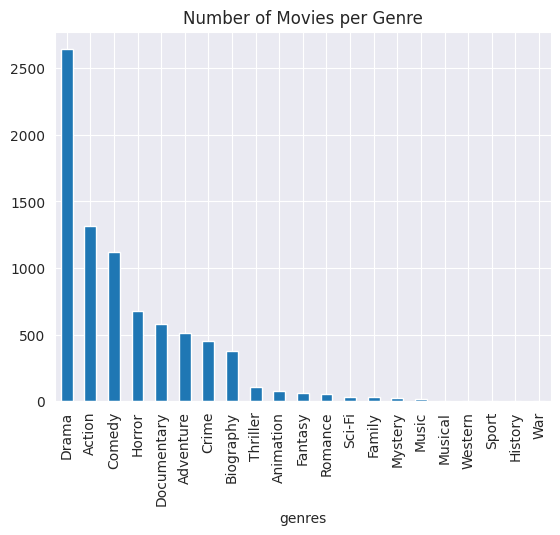

In [343]:
# Understanding Genre Performance
movie_df['genres'].value_counts().plot(kind='bar', title="Number of Movies per Genre");


Helps identify which genres are most and least produced. Genre Most produced are Dramas

Revenue & Budget Distribution

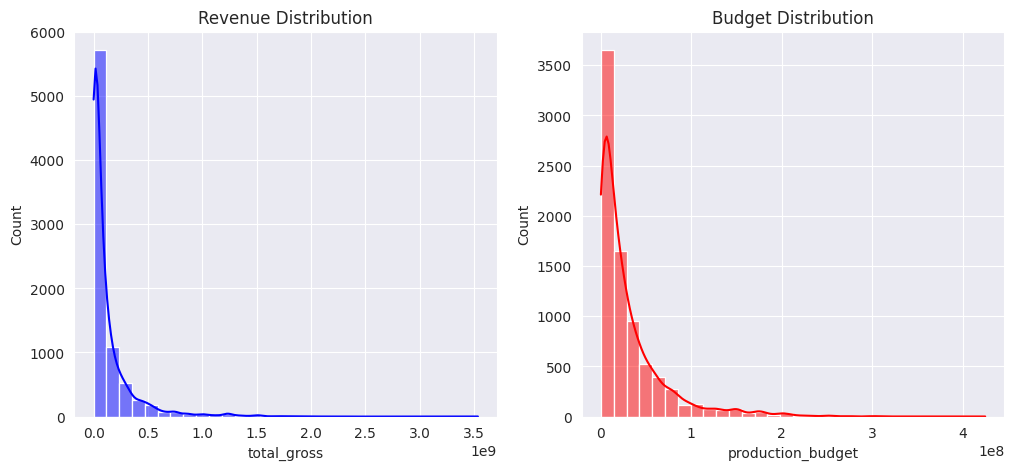

In [354]:
# Are revenues and budgets normally distributed? or not
plt.figure(figsize=(12,5))

# Revenue distribution
plt.subplot(1,2,1)
sns.histplot(movie_df['total_gross'], bins=30, kde=True, color='blue')
plt.title("Revenue Distribution")

# Budget distribution
plt.subplot(1,2,2)
sns.histplot(movie_df['production_budget'], bins=30, kde=True, color='red')
plt.title("Budget Distribution")

plt.show()


Our data is right-skewed,common in datasets involving revenue and production budgets, as a small number of movies (blockbusters) tend to generate significantly higher revenues or have higher budgets compared to the majority.Most of the values are concentrated around the lower end of the range (e.g., smaller production budgets or lower revenues), while the tail on the right side represents a small number of movies with extraordinarily high values (e.g., blockbuster hits).

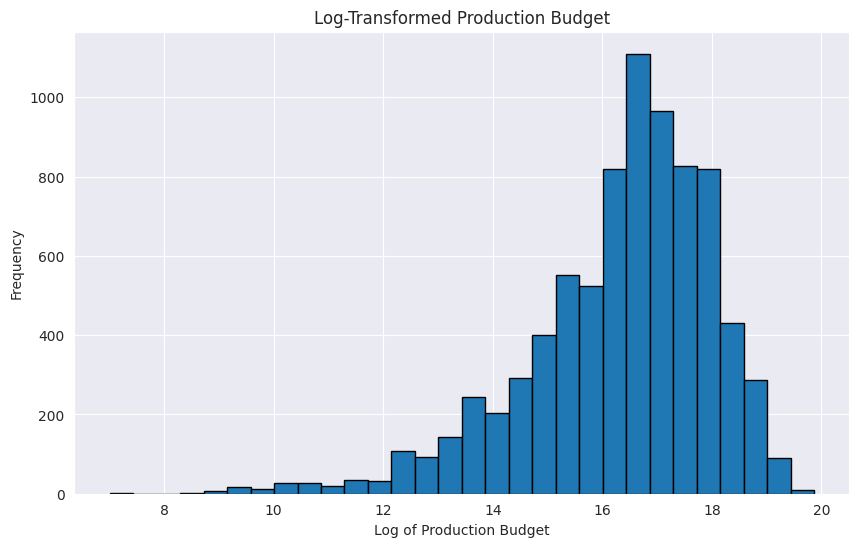

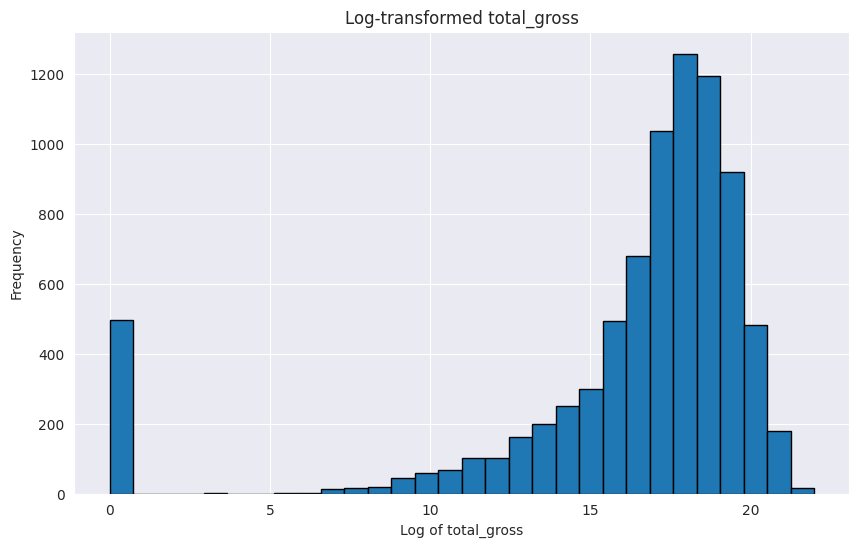

In [360]:
import numpy as np

# Apply log transformation (adding a small constant to avoid log(0) if necessary)
movie_df['log_production_budget'] = np.log(movie_df['production_budget'] + 1)
movie_df['log_total_gross'] = np.log(movie_df['total_gross'] + 1)

# Plot the log-transformed data
plt.figure(figsize=(10, 6))
plt.hist(movie_df['log_production_budget'], bins=30, edgecolor='black')
plt.title('Log-Transformed Production Budget')
plt.xlabel('Log of Production Budget')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(10, 6))
plt.hist(movie_df['log_total_gross'], bins=30, edgecolor='black')
plt.title('Log-transformed total_gross')
plt.xlabel('Log of total_gross')
plt.ylabel('Frequency')
plt.show()
# Applying Log transformations  to handle this right-skewed data.
# It compresses the higher values (long tail) and makes the data distribution more symmetric.


In [400]:
# Number of Movies per Genre:
# Shows how frequently a genre is produced.
# Calculation: df['genre'].value_counts()
movie_df['genres'].value_counts()

,count
genres,
Drama,2643
Action,1318
Comedy,1120
Horror,679
Documentary,582
Adventure,514
Crime,451
Biography,379
Thriller,110


# Bivariate Analysis

## Key Metrics of Success

To determine which genres perform best at the box office, consider these key metrics:

## 1. Financial Metrics (Revenue-Based)


**Total & Average Revenue per Genre**

Helps Identifies top-earning genres. We are analyzing how the sum and average of the revenue vary across different genres, with each metric providing different insights

In [349]:
# 1. Financial Metrics (Revenue-Based)
# Total Box Office Revenue: (Measures overall performance of a genre.)
# The total revenue for each genre is the sum of the revenue generated by all movies in that genre.
# This metric is helpful for understanding which genres, as a whole, contribute the most to overall revenue.
# High total revenue can indicate that the genre has a large number of films (even if individual movies perform moderately) or that it has a few high-performing blockbusters that dom
gross_by_genre = movie_df[['genres', 'total_gross']]
gross_by_genre.groupby('genres').sum().sort_values(by='total_gross', ascending=False).head(5)


,total_gross
genres,
Action,277220873707
Drama,263796955590
Adventure,114051712785
Comedy,107908395531
Horror,74701658168


<Axes: title={'center': 'Total Revenue per Genre'}, xlabel='genres'>

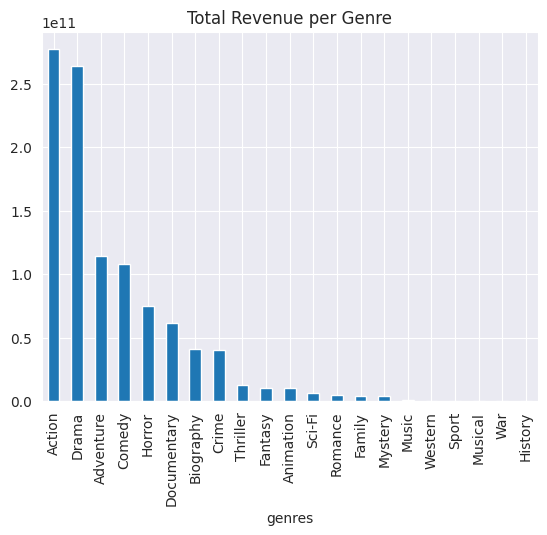

In [348]:
# Total Revenue gives you an idea of which genre is the most commercially successful overall.
movie_df.groupby('genres')['total_gross'].sum().sort_values(ascending=False).plot(kind='bar', title="Total Revenue per Genre")


collectively, all the action movies in your dataset have earned the most money compared to movies in other genres.
(This could be due to a large number of action movies, or the action movies themselves may have performed exceptionally well in terms of revenue.)
High total revenue doesn't necessarily mean high average revenue. If a genre has a large number of films, but they are mostly lower-revenue films, the total revenue might be high, but the average revenue could still be low.

In [351]:
# Average Revenue per Movie (Mean Gross):
# Helps compare genres with different numbers of movies.
# The average revenue is the mean of all revenue values within a genre.
# This tells you how much a typical movie in that genre makes on average.
# Calculation: total_revenue / number_of_movies_per_genre
movie_df.groupby('genres')['total_gross'].mean().sort_values( ascending=False).head(5)

,total_gross
genres,
Sci-Fi,2.255423e+08
Adventure,2.218905e+08
Action,2.103345e+08
Mystery,1.796644e+08
Family,1.607511e+08


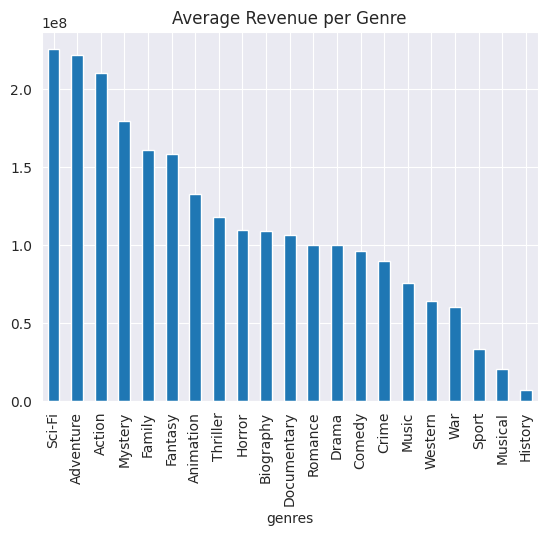

In [347]:
# Average Revenue helps you understand which genre produces higher-grossing films on average, regardless of how many movies belong to that genre.
movie_df.groupby('genres')['total_gross'].mean().sort_values(ascending=False).plot(kind='bar', title="Average Revenue per Genre");

 The average is useful for understanding which genres typically perform well on an individual basis.
 A high average revenue suggests that the movies in that genre, on average, tend to perform well.If a genre has a low average revenue, it might indicate that while the genre has a few successful films, most films underperform.Average revenue is more stable than total revenue since it accounts for the number of movies and helps isolate the performance of typical films in each genre

 indicates that, on average, each sci-fi movie has earned more than other genres. **Action** movies may be more numerous  boosting their total revenue.**Sci-fi** movies, although fewer, may have a few high-performing films that push the average revenue higher.

**Median Revenue per Genre**:

The median (represents the middle value when all revenues within a genre are sorted), itis less sensitive to outliers than the mean, providing a better measure of central tendency for data with skewness or extreme values. If certain genres (Mystery,Action,Adventure,Western,Sci-fi) have higher median revenue values compared to others, it suggests that these genres are more likely to generate higher revenues on average. Genres with low or consistent median revenue might indicate that these genres do not perform as well financially, or that movies in these genres are more likely to have lower or similar revenue outcomes, indicating that these films tend to attract smaller audiences or have niche markets.

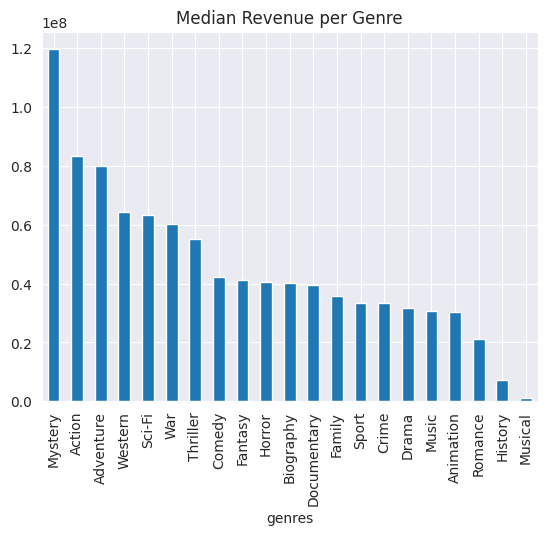

In [364]:
# Reduces the effect of outliers (huge blockbusters vs. small films).
# Calculation: df.groupby('genre')['total_revenue'].median()
movie_df.groupby('genres')['total_gross'].median().sort_values(ascending=False).plot(kind='bar', title="Median Revenue per Genre");

The median revenue values for each genre will tell you the central tendency of the revenue within that genre. Genres with a high median value suggest that the typical movie in that genre performs well financially.

*Outliers and Revenue Distribution*

Even though the median is robust against extreme values, we went a step further to investigate the distribution within each genre (top 3 and bottom 3) using Boxplots or histograms to reveal if a genre has a wide range of revenue, where a few movies in the genre might perform extremely well (outliers).

A high median with large variation could suggest that while most movies in the genre perform well, there are some extremely high-performing outliers.

<ipython-input-374-d9299c7d6bb6>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='genres', y='total_gross', data=top_bottom_genres_df, palette='coolwarm')


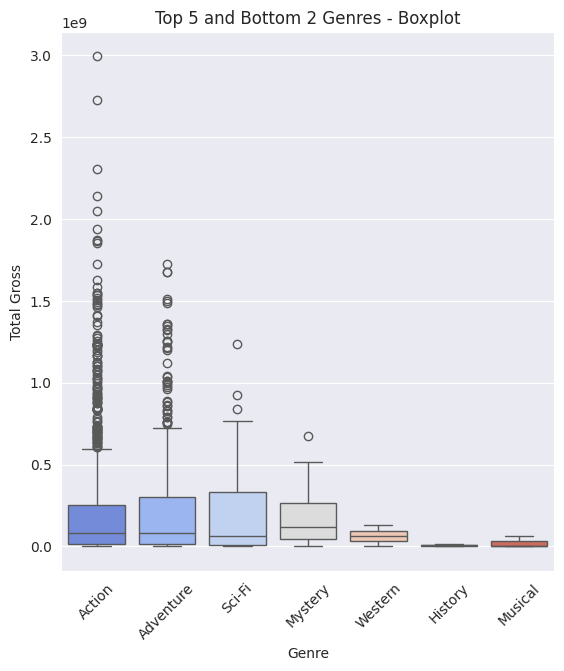

<Figure size 640x480 with 0 Axes>

In [374]:
# Calculate median total gross revenue per genre
median_revenue_per_genre = movie_df.groupby('genres')['total_gross'].median().sort_values(ascending=False)

# Get top 3 and bottom 3 genres based on median total revenue
top_5_genres = median_revenue_per_genre.head(5).index
bottom_2_genres = median_revenue_per_genre.tail(2).index

# Filter the DataFrame for the top 3 and bottom 3 genres
top_bottom_genres_df = movie_df[movie_df['genres'].isin(top_3_genres.append(bottom_3_genres))]

# Set up the plotting area
plt.figure(figsize=(14, 7))

# Plot the distribution of total gross for top 3 genres
plt.subplot(1, 2, 1)
sns.boxplot(x='genres', y='total_gross', data=top_bottom_genres_df, palette='coolwarm')
plt.title('Top 5 and Bottom 2 Genres - Boxplot')
plt.xlabel('Genre')
plt.ylabel('Total Gross')
plt.xticks(rotation=45)
plt.show()
plt.savefig('revenue_distribution_per_genre.png', dpi=300)


This boxplot visualizes the total gross revenue of movies across various genres, focusing on the top 5 high-performing genres (Action, Adventure, Sci-Fi, Mystery) and the bottom 2 genres (Western, History, Musical).

Numerous outliers are visible above the whiskers, indicating the presence of a few movies that performed exceptionally well.

**1. Identifying High-Performing Genres:**
Action, Adventure, and Sci-Fi have the largest median revenues compared to other genres, suggesting consistent performance at the box office.
These genres also display numerous outliers above the upper whisker, indicating that a few movies significantly outperformed their peers, contributing to their high overall revenue.
Mystery follows as a relatively strong performer but shows less variation compared to the top 3 genres.
These genres could be considered high-performing because of both their high medians and presence of blockbuster outliers.

**2. Outliers and Revenue Distribution:**
The Action and Adventure genres exhibit the widest range in revenue, with many outliers in the upper range. This suggests a mix of moderately performing movies and a few exceptional box office hits driving the genre's overall performance.
Sci-Fi also has notable variation, but its distribution appears slightly more centralized than Action and Adventure (this can be because there are only **29** sci-fi films in the dataset).
Mystery shows moderate variability with fewer extreme outliers, suggesting it is less reliant on blockbusters for its median performance.
In contrast, Western, History, and Musical show much smaller revenue distributions, with low medians and fewer outliers. These genres consistently underperform relative to the top genres.

**3. Recommendations for Investigating Further:**
Action and Adventure genres should be analyzed to understand what factors contribute to the outliers (e.g., franchise movies, high budgets, specific directors).
Investigate the correlation between production budgets and box office success in Sci-Fi movies to determine if higher spending consistently leads to better performance.
Consider genre combinations or trends (e.g., Sci-Fi Adventure) to pinpoint patterns that contribute to high revenues.
Study the performance of niche genres like Mystery to explore their potential for profitability in specific markets.



**Revenue Distribution per Genre:**

In [376]:
# Understanding variability within genres.
# Calculation: df.groupby('genre')['total_revenue'].describe()
movie_df.groupby('genres')['total_gross'].describe()

,count,mean,std,min,25%,50%,75%,max
genres,,,,,,,,
Action,1318.0,2.103345e+08,3.367682e+08,0.0,15861187.75,83303499.0,2.518144e+08,2.989973e+09
Adventure,514.0,2.218905e+08,3.237661e+08,0.0,13549314.25,79830894.0,3.012217e+08,1.722886e+09
Animation,76.0,1.327190e+08,2.505095e+08,0.0,3604989.00,30329249.5,1.102668e+08,1.326856e+09
Biography,379.0,1.091810e+08,1.789444e+08,0.0,7804831.50,40169934.0,1.370068e+08,1.408000e+09
Comedy,1120.0,9.634678e+07,1.443297e+08,0.0,4371103.00,42358335.0,1.276072e+08,1.378234e+09
Crime,451.0,9.006015e+07,1.635872e+08,0.0,5095644.00,33334168.0,1.006953e+08,1.501589e+09
Documentary,582.0,1.063287e+08,1.789556e+08,0.0,4498681.00,39565576.5,1.362084e+08,1.519249e+09
Drama,2643.0,9.980967e+07,1.791078e+08,0.0,5424586.00,31636886.0,1.132363e+08,1.763214e+09
Family,28.0,1.607511e+08,3.949039e+08,0.0,0.00,35881770.0,7.660838e+07,1.763214e+09


The table provides summary statistics for total gross revenue per genre, helping us understand variability, skewness, and revenue trends in the movie industry.

Key Observations
1. **Highest-Grossing Genres (on Average)**
Sci-Fi (225M), Adventure (221M), and Action (210M) have the highest mean revenues, indicating they are generally profitable.
These genres also have high standard deviations, meaning revenue varies widely (some movies perform exceptionally well, while others underperform).
Maximum values for these genres reach into the billions, suggesting blockbuster hits.
2.  **High Variability Genres(Large Standard Deviation)**
Action, Adventure, and Horror exhibit large standard deviations (300M+), meaning revenues within these genres are highly inconsistent.
These genres often have big-budget hits and major flops.
The max revenue for Horror (3.5B) is an outlier, possibly due to a single extraordinarily successful film.
3.  **More Consistent Genres (Lower Standard Deviation)**
Documentary (179M), Biography (178M), and Comedy (144M) have lower standard deviations, meaning revenue distribution is more predictable.
The revenue differences within these genres are relatively smaller, and extreme hits are rarer.
4.  **Right-Skewed Distributions (Mean > Median)**
Action, Adventure, and Horror have means much higher than their medians, indicating a right-skewed distribution.
A few blockbuster movies drive up the mean, while most movies earn significantly less.
5.  **Genres with Low Revenue and Small Sample Sizes**
Musical, Sport, and War genres have very few movies (≤ 3 entries), making their revenue stats less reliable.
Western (2 movies) and History (2 movies) have low counts, meaning any outliers have a major effect on the mean.
The War genre has only one movie, so the standard deviation is NaN (not applicable).
6.  **The Impact of Outliers**
Horror: Despite a median revenue of 40M, its mean is 110M, and its max is 3.5B—indicating a massive blockbuster affecting the average.
Action: Has a max of 2.9B, pulling the mean upwards even though its median is only 83M.
Final Insights
Action, Adventure, and Sci-Fi are the highest-earning genres on average, but their revenue is highly variable.
Horror has a few extremely high-grossing films, but most movies make significantly less than the top performers.
Comedy and Drama have more stable revenues, meaning earnings in these genres are more predictable.
The median is a better measure than the mean for skewed distributions like Action and Horror, where a few massive hits distort the average.
Genres with low sample sizes (Sport, Musical, War, Western) need careful interpretation, as their statistics may not be reliable.

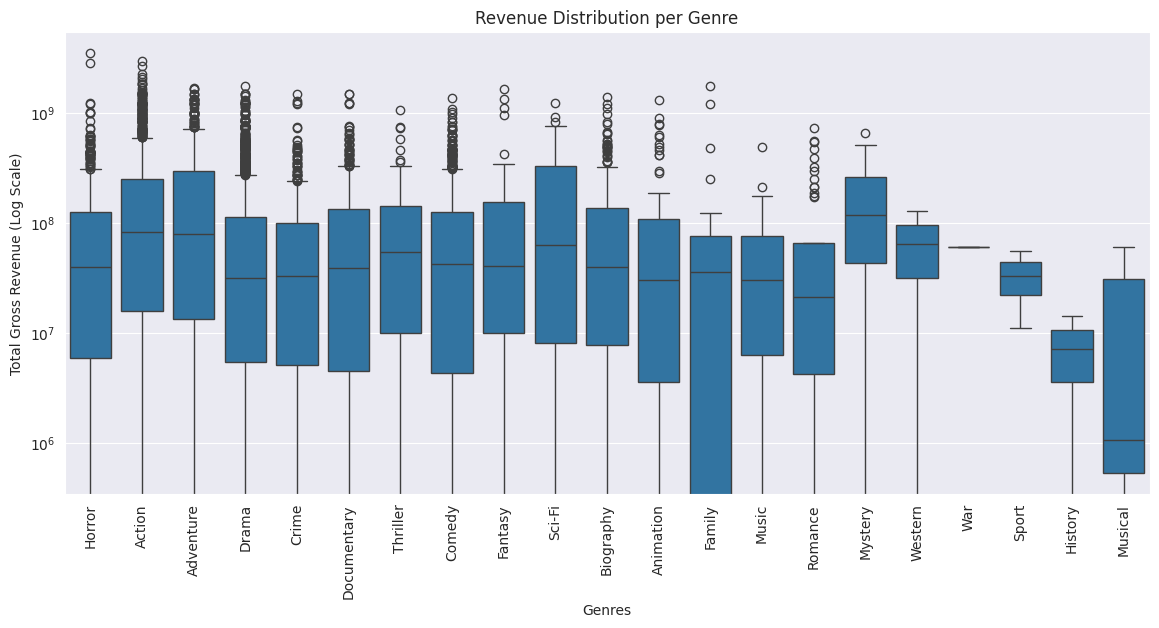

In [378]:
# Boxplot: Revenue Distribution per Genre
plt.figure(figsize=(14, 6))
sns.boxplot(data=movie_df, x=movie_df.genres, y=movie_df.total_gross, showfliers=True)
plt.xticks(rotation=90)
plt.yscale('log')  # Using log scale to better visualize differences
plt.title("Revenue Distribution per Genre")
plt.xlabel("Genres")
plt.ylabel("Total Gross Revenue (Log Scale)")
plt.show()


**Revenue vs. Budget (Does Spending More Lead to Higher Earnings?)**

scatter plot or correlation analysis between total revenue and production budget helps us determine whether higher spending leads to higher earning

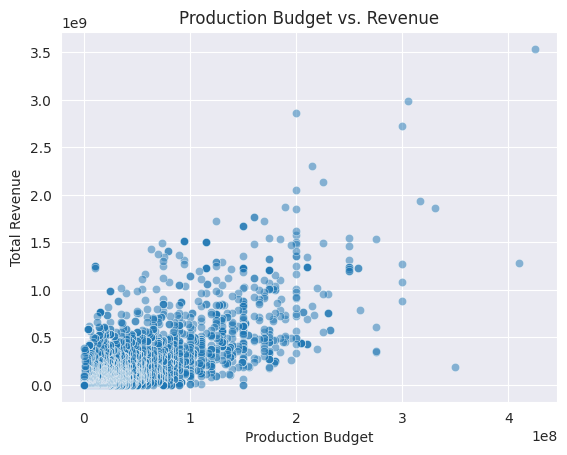

In [387]:
sns.scatterplot(x=movie_df['production_budget'], y=movie_df['total_gross'], alpha=0.5)
plt.title("Production Budget vs. Revenue")
plt.xlabel("Production Budget")
plt.ylabel("Total Revenue")
plt.show()


In [389]:
movie_df.production_budget.corr(movie_df.total_gross)

0.7205813698841163

A positive correlation (higher budget → higher revenue). The plot displays a positive correlation between production budget and total revenue. As the production budget increases, the total revenue tends to increase as well. However, the correlation is not perfectly linear—there is noticeable spread in the data points.

Detailed Analysis:

**Strong clustering at lower budgets**:

A significant number of movies have low production budgets (under 50 million), and their revenues are spread widely, ranging from minimal to moderately high revenue. This indicates that a low-budget movie can either underperform or occasionally achieve high revenue, but the latter is less frequent.

**High-budget outliers**:

Movies with production budgets exceeding 200 million tend to generate much higher revenues, often surpassing $1 billion. These are likely blockbuster movies with significant marketing and franchise value (e.g., superhero movies, sequels).

**Diminishing returns**:

While higher budgets often result in higher revenues, the relationship appears to plateau at very high budgets (e.g., above 300 million). Beyond this point, increasing the budget does not guarantee a proportional increase in revenue.

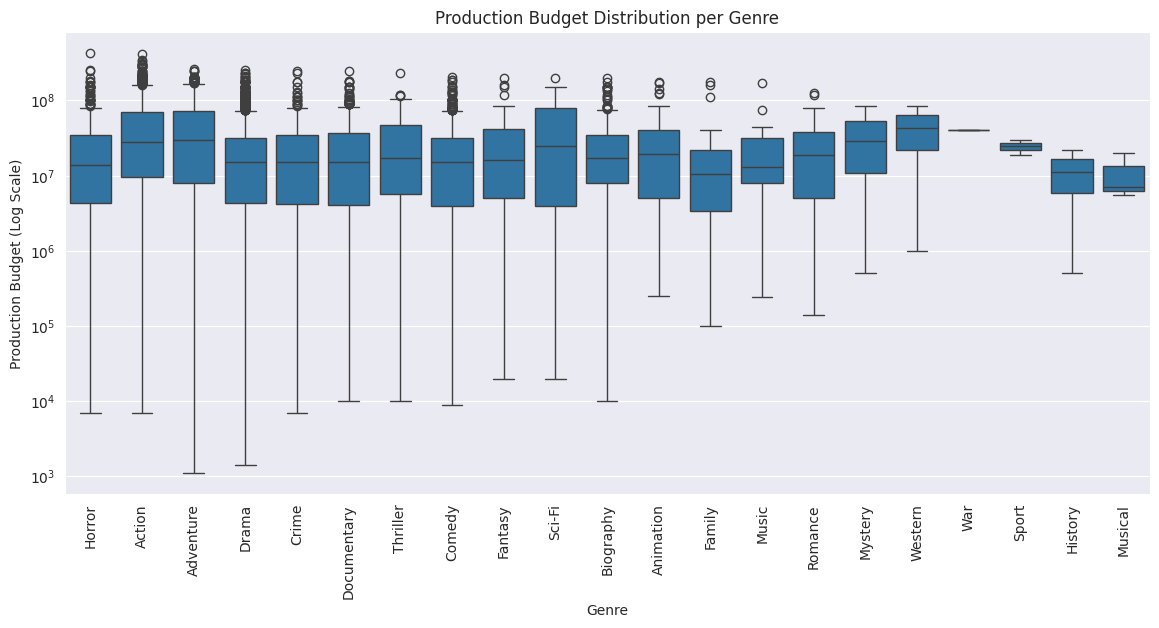

In [395]:
# Boxplot: Distribution of Production Cost per Genre
# A boxplot shows the spread of production costs within each genre and highlights outliers.
plt.figure(figsize=(14, 6))
sns.boxplot(data=movie_df, x=movie_df.genres, y=movie_df.production_budget, showfliers=True)
plt.xticks(rotation=90)
plt.yscale('log')  # Log scale to improve visibility of variations
plt.title("Production Budget Distribution per Genre")
plt.xlabel("Genre")
plt.ylabel("Production Budget (Log Scale)")
plt.show()


Outliers (dots above the whiskers) represent exceptionally high-budget films.

The medians (middle line in the box) do not vary significantly across the genres, suggesting that some genres have consistently higher production costs.

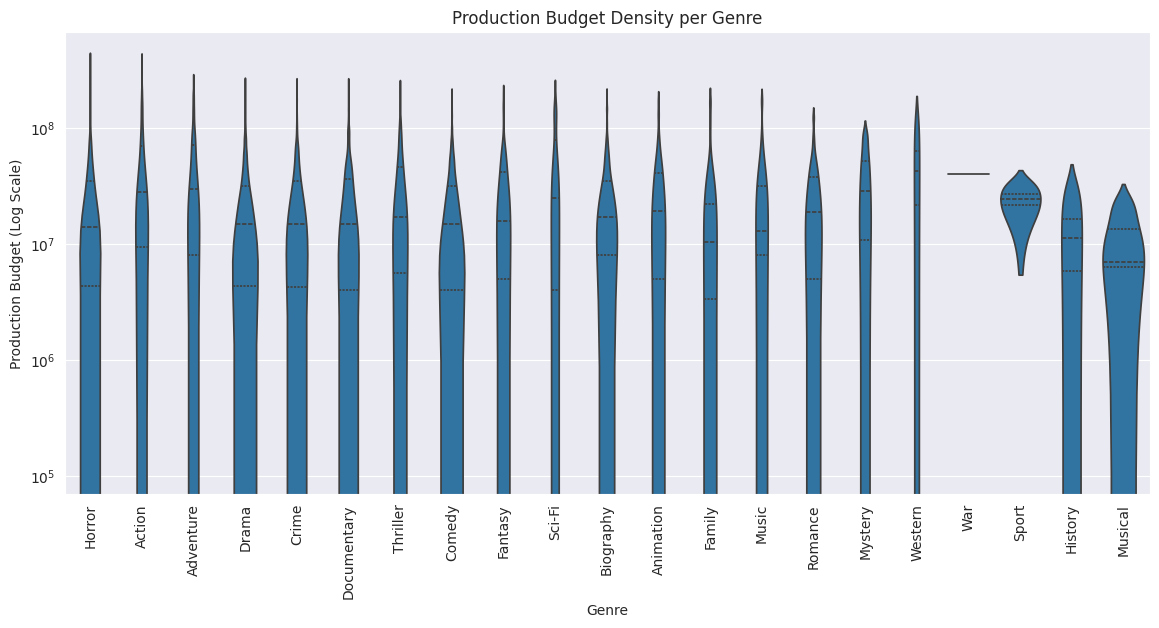

In [396]:
plt.figure(figsize=(14, 6))
sns.violinplot(data=movie_df, x=movie_df.genres, y=movie_df.production_budget, inner="quartile")
plt.xticks(rotation=90)
plt.yscale('log')
plt.title("Production Budget Density per Genre")
plt.xlabel("Genre")
plt.ylabel("Production Budget (Log Scale)")
plt.show()


Only Musical and Sport genres have a **wider shape at the top, meaning majority of movies have high production costs**.

Majority of the genres are narrow at the top but wide at the bottom, **indicating most movies in that genre have lower budgets**, with only a few high-budget outliers

<ipython-input-397-f353923d6581>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_budget.index, y=avg_budget.values, palette="coolwarm")


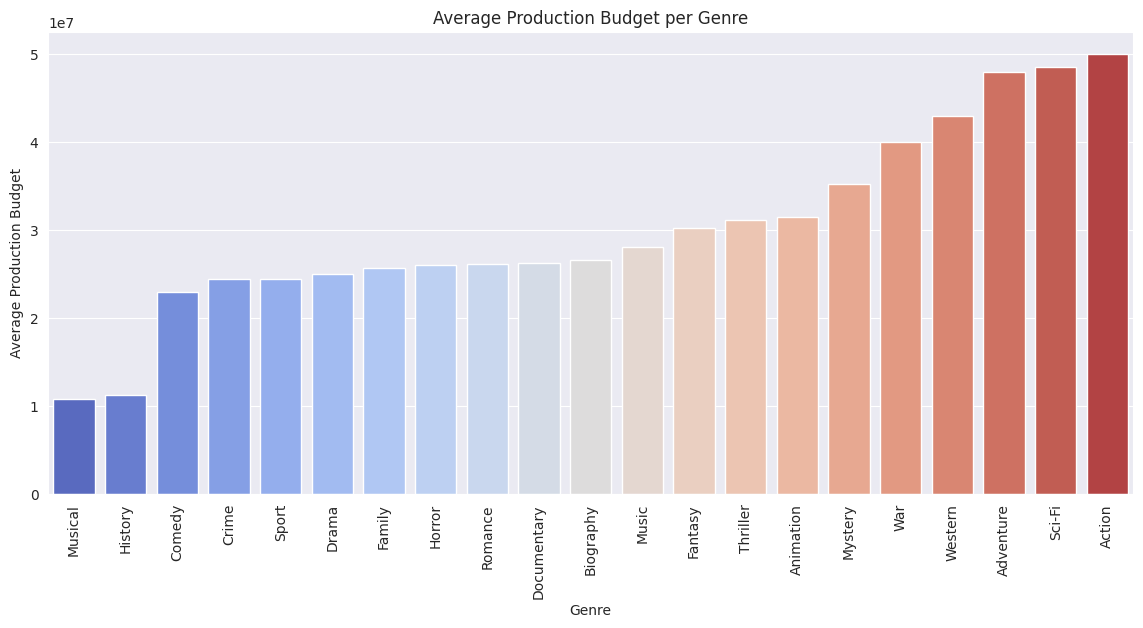

In [397]:
# Bar Chart: Average Production Cost per Genre
# This shows the mean production budget for each genre.
avg_budget = movie_df.groupby('genres')['production_budget'].mean().sort_values()
plt.figure(figsize=(14, 6))
sns.barplot(x=avg_budget.index, y=avg_budget.values, palette="coolwarm")
plt.xticks(rotation=90)
plt.title("Average Production Budget per Genre")
plt.xlabel("Genre")
plt.ylabel("Average Production Budget")
plt.show()


Higher bars indicate genres with larger average production costs.

genres like Action, Sci-Fi, Adventure, Western has the highest bars, it **suggests big-budget productions are common in these genres**.

Lower bars (e.g. musical, History) **suggest most movies in these genres are low-budget**.

2. Popularity & Market Share

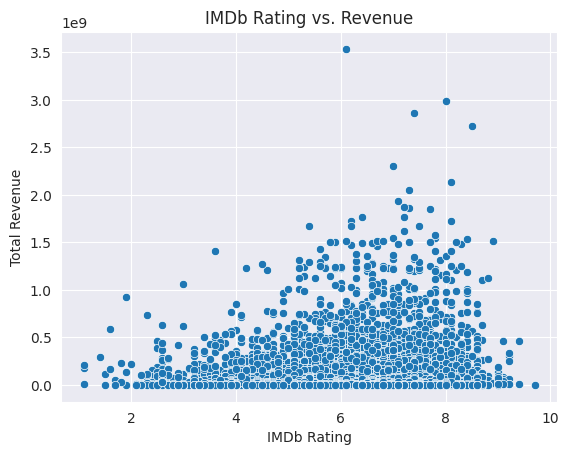

In [405]:
# Rating vs. Revenue
# Do highly-rated movies earn more? Helps determine if ratings impact revenue.
sns.scatterplot(x=movie_df['averagerating'], y=movie_df['total_gross'])
plt.title("IMDb Rating vs. Revenue")
plt.xlabel("IMDb Rating")
plt.ylabel("Total Revenue")
plt.show()


**Trend:**

There is a general upward trend, indicating that movies with higher ratings tend to earn more revenue. However, this relationship is not perfectly linear, as some low-rated movies also earn significant revenue.
Clusters:

**Many movies with moderate ratings (around 5 to 7) cluster in the lower revenue range**.
A smaller number of movies with very high ratings (8 or above) achieve much higher revenue levels.
Outliers:

A **few movies with exceptional revenue (above $3 billion) have relatively high ratings (7 to 8)**.

The plot aims to investigate whether highly-rated movies earn more revenue, helping determine the impact of ratings on box office success. While higher ratings generally correspond to higher revenue, other factors (e.g., marketing, genre, and production budget) likely also play a significant role.

In [424]:
# Correlation Analysis
# Calculate the Pearson correlation coefficient between ratings and revenue:
movie_df['averagerating'] = movie_df['averagerating'].astype(float)
movie_df[['averagerating', 'total_gross']].corr().iloc[0, 1]

0.07128909311584737

The Pearson correlation coefficient measures the linear relationship between ratings and revenue:

**r > 0**: There is a positive correlation; higher-rated movies tend to have higher revenue.

**r = 0**: No linear relationship between ratings and revenue.

**r < 0**: There is a negative correlation; higher-rated movies tend to have lower revenue.

 **0.071289** indicates a very weak positive correlation between movie ratings (averagerating) and total revenue (total_gross).

 Correlation value close to 0 suggests that there is almost no linear relationship between the two variables. In other words, movie ratings have very little impact on total revenue.

 The small positive value (0.07) shows that there may be a slight tendency for higher-rated movies to have slightly higher revenues, but this relationship is weak and not very significant.

 The weak correlation suggests that other factors (such as marketing, genre, cast, etc.) might have a much larger impact on revenue than the movie ratings alone

# Market Share per Genre:

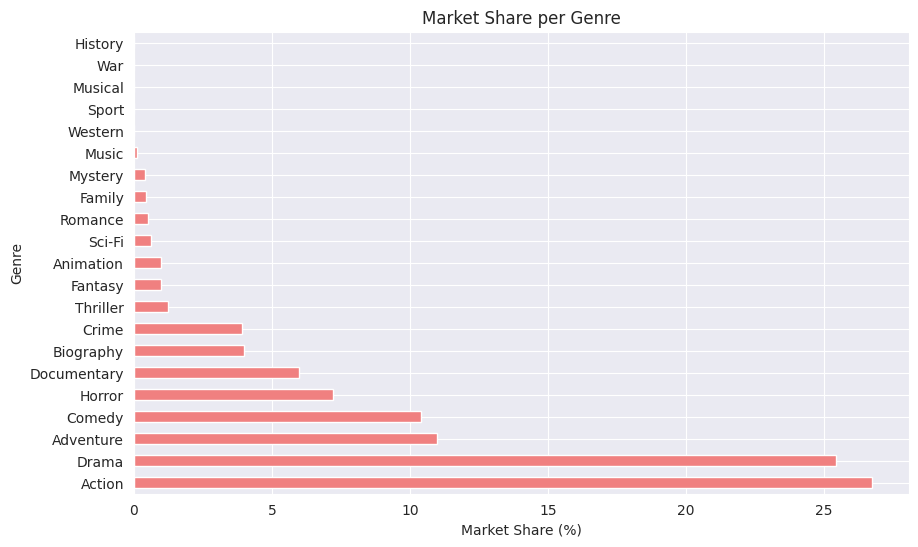

genres
Action         26.728422
Drama          25.434147
Adventure      10.996366
Comedy         10.404055
Horror          7.202407
Documentary     5.966519
Biography       3.989640
Crime           3.916125
Thriller        1.250345
Fantasy         0.993011
Animation       0.972510
Sci-Fi          0.630628
Romance         0.510143
Family          0.433970
Mystery         0.415739
Music           0.123910
Western         0.012387
Sport           0.006439
Musical         0.006035
War             0.005823
History         0.001377
Name: total_gross, dtype: float64


In [440]:

# How much revenue each genre contributes to total earnings.
# Calculate total revenue
total_revenue = movie_df['total_gross'].sum()

# Calculate total revenue per genre
genre_revenue = movie_df.groupby('genres')['total_gross'].sum()

# Calculate market share per genre
market_share = (genre_revenue / total_revenue) * 100

# Sort market share in descending order
market_share_sorted = market_share.sort_values(ascending=False)

# Plotting
market_share_sorted.plot(kind='barh', color='lightcoral', figsize=(10, 6))
plt.title('Market Share per Genre')
plt.xlabel('Market Share (%)')
plt.ylabel('Genre')
plt.show()

# Print market share
print(market_share_sorted)


The chart will show how much each genre contributes to the total box office revenue, with larger bars representing genres with higher market share.

Genres like **Action,Drama,Adventure,Comedy** dominate the market, while others, like **History,War,Musical,Sport,Western** had the smallest share.

This provides insight into which genres are more commercially successful and which are underrepresented.

# **3. Budget & Profitability Metrics**

**ROI (Return on Investment)** is a financial metric used to evaluate the profitability or effectiveness of an investment relative to its cost. It measures how much profit or gain you make from an investment compared to the initial amount you invested.

We will analyze both the **Worldwide ROI** and **Box Office ROI** and to get a full picture of immediate and long-term profitability for different genres.

A positive ROI indicates that the investment has made a profit.
A negative ROI indicates that the investment has resulted in a loss.
The higher the ROI, the more profitable the investment is.

**Key Differences in Interpretation:**

**Revenue Focus:**

Worldwide Gross ROI:

Focuses on **all sources of revenue** (box office, streaming, merchandising, etc.). A high ROI here might indicate strong cross-platform success.

*Box Office ROI:*

**Focuses solely on box office performance.** A high ROI here reflects strong theater success relative to the movie's budget.

**Granularity:**

*Worldwide ROI:*

Calculated at the individual movie level, then aggregated to genres.

*Box Office ROI:*

Calculated at the genre level directly (after averaging ROI for each movie within a genre).

**Profitability in Broader vs. Specific Contexts:**

*Worldwide Gross ROI:*

Useful for **understanding overall profitability across all revenue channels**. It may indicate whether a genre is benefiting from ongoing revenue after release (e.g., through DVD or streaming sales).

*Box Office ROI*:

Useful for **understanding the immediate success of a movie in theaters**. It helps gauge how well the genre performs in the cinematic market.

**Long-term vs. Immediate Returns:**

*Worldwide Gross ROI:*

Can **indicate long-term profitability**, considering ongoing revenue sources beyond the box office (streaming, TV, DVD sales, etc.).

*Box Office ROI: *

**Provides a snapshot of the immediate return on investment from theaters alone**.





## **WorldWide ROI**

**Focus:** This approach **measures how profitable each individual movie is in terms of its total earnings** (revenue from all sources, such as box office, streaming, etc.) relative to its production budget, it includes not just box office revenue but also other sources such as DVD sales, streaming, merchandise, and licensing deals.

**High ROI**: If a genre has a high ROI, it means that movies in that genre are generating much more income than their production budgets across all revenue sources and might indicate that these movies tend to perform well across multiple platforms (theater, TV, streaming, and merchandising), not just in theaters.

**Low or Negative ROI**: A negative or low ROI for a genre means that, on average, movies in that genre are not covering their production costs, considering all sources of revenue. This might suggest that the genre is failing to attract enough attention across all revenue channels to justify its production budget.

The ROI calculated here is based on the **global earnings or worldwide gross**, which includes all the revenue sources for the movie.

**Use Case:** It's useful for assessing the **overall profitability** of each movie and, when aggregated, gives insights into how the entire genre is performing in terms of return on its production costs.(in the broader context of a movie's entire revenue generation, not just in theaters.)

**It can help you determine which genres are successful in multiple revenue streams.**

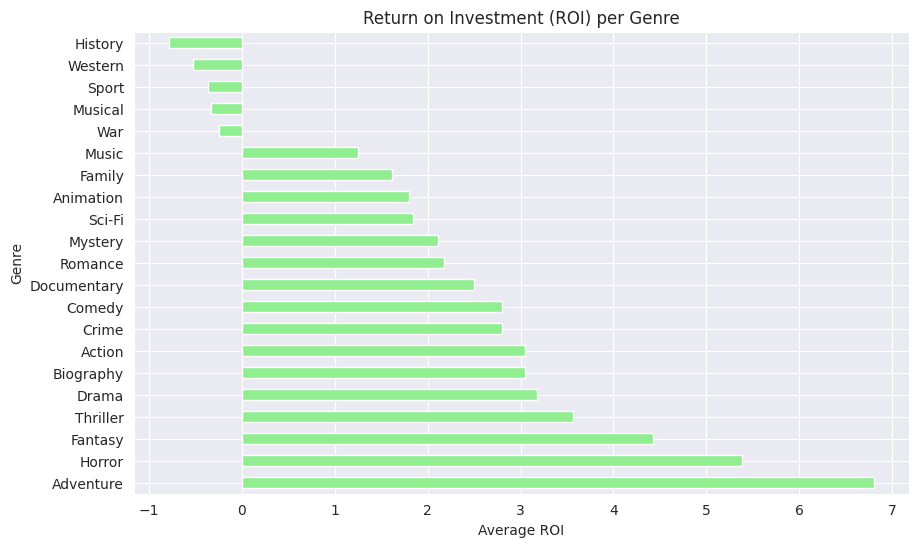

genres
Adventure      6.801783
Horror         5.385776
Fantasy        4.431837
Thriller       3.565980
Drama          3.176475
Biography      3.051331
Action         3.043520
Crime          2.801681
Comedy         2.797003
Documentary    2.496875
Romance        2.170751
Mystery        2.111747
Sci-Fi         1.837291
Animation      1.801138
Family         1.613183
Music          1.251912
War           -0.245022
Musical       -0.332265
Sport         -0.362080
Western       -0.524518
History       -0.785259
Name: roi, dtype: float64


In [442]:
# Return on Investment (ROI):
# Shows how profitable a genre is
# Calculate ROI
movie_df['roi'] = (movie_df['worldwide_gross'] - movie_df['production_budget']) / movie_df['production_budget']

# Group by genre and calculate the mean ROI
mean_roi_per_genre = movie_df.groupby('genres')['roi'].mean().sort_values(ascending=False)

# Plotting
mean_roi_per_genre.plot(kind='barh', color='lightgreen', figsize=(10, 6))
plt.title('Return on Investment (ROI) per Genre')
plt.xlabel('Average ROI')
plt.ylabel('Genre')
plt.show()

# Print mean ROI per genre
print(mean_roi_per_genre)


The **ROI tells us how profitable a genre is relative to its production budget. A higher ROI means the genre is more profitable.**

1. For example, if Adventure has an ROI of 6.801783, it means, on average, for every dollar spent on production, Action movies make 6.8 dollars in gross revenue.

2. Conversely, a genre like Music with an ROI of 1.3 would mean that for every dollar spent, only 80 cents is returned, indicating lower profitability.

3. If ROI (Return on Investment) is negative e.g. history with -0.8 , it indicates that the investment has resulted in a loss, meaning that the revenue or returns generated from the investment are less than the initial cost. Loss of Investment: A negative ROI means that the movie (or any investment) was not profitable. It generated less revenue than the initial cost, resulting in a loss. Business Implications: A negative ROI can be concerning, especially in the context of movie production, where high production budgets are common. It suggests that the movie did not perform well at the box office or did not recover its production costs through other revenue channels

4. Negative Impact on Genre or Franchise: If a genre consistently shows a negative ROI, it might indicate that movies in that genre are, on average, not producing sufficient returns, leading studios or investors to reconsider their future investments in that genre.
**A negative ROI is a red flag that signals an unprofitable investmen**

Genres with **high average ROI** e.g.

Adventure - 6.801783

Horror - 5.385776

Fantasy - 4.431837

are likely producing profitable movies relative to their budgets.

While genres with **lower ROI** \are less efficient in terms of returns.

Musical - (-0.332265)

Sport - (-0.362080)

Western - (-0.524518)

History - (-0.785259)

 ## Box Office ROI

This ROI measures the profitability of movies based on just their box office revenue relative to the production budget.

Provides a focused view of how well a genre performs in theaters

**High ROI:** If a genre has a high ROI from box office earnings, it indicates that movies in that genre are performing **exceptionally well** in theaters compared to their production costs. This is especially important for studios or investors concerned about the financial performance in cinemas, as **it directly measures the return on the money spent in movie production**.

Example: If Action movies have a high ROI from the box office, it could mean that action-packed blockbusters tend to draw large audiences to theaters and have high ticket sales relative to their production budgets.

**Low or Negative ROI:** A low or negative ROI for a genre indicates that, on average, movies in that genre are not generating enough box office revenue to justify their production costs. This can be an important indicator of a genre that is underperforming in theaters.

 If Horror movies have low ROI, it **might** mean that while **some horror films do well in theaters, many may not perform sufficiently well to cover their production costs.**

**Use Case:**

This ROI is important if you are specifically concerned with the box office performance of movies. It helps you assess how a genre is performing in theaters alone, which can be useful for making decisions about marketing and releasing movies.

**Studios and investors may prioritize this ROI because box office performance is often a key factor in a movie's initial financial success.**

In [444]:
# Calculate Box Office ROI
movie_df['roi'] = (movie_df['total_gross'] - movie_df['production_budget']) / movie_df['production_budget']

# Group by genre and calculate the mean ROI
roi_per_genre = movie_df.groupby('genres')['roi'].mean().sort_values(ascending=False)

# Display the ROI table
print(roi_per_genre)



genres
Adventure      12.845887
Horror          9.220515
Fantasy         6.826819
Thriller        6.803041
Drama           5.951357
Crime           5.311143
Biography       5.306853
Action          5.093747
Comedy          5.059427
Documentary     4.567620
Romance         4.234647
Mystery         3.889886
Animation       3.596362
Family          3.477392
Sci-Fi          3.446920
Music           2.917270
War             0.509955
Sport           0.219817
Musical         0.088803
Western        -0.244273
History        -0.675371
Name: roi, dtype: float64


Box Office ROI is more Focused on **box office earnings**, which **may not fully reflect the true profitability of a movie or genre** (especially if other revenue sources are significant

## Interpretation of Box Office ROI:

Positive Box Office ROI:

**High ROI (> 1 or > 100%):** If the ROI is greater than 1 (or 100%), the movie made more than the initial investment, which is a strong indication that the movie was financially successful. For example, if a movie has a Box Office ROI of 3.85 (in millions), it means that for every dollar spent on production, the movie earned 3.85 dollars from the box office.

**Moderate ROI (~ 1 or 100%):** An ROI close to 1 means that the movie broke even. It did not make a huge profit, but it didn't lose money either.

**Low ROI (0 - 1):** A low ROI means the movie barely made back its production costs from the box office. For instance, a Box Office ROI of 0.5 means the movie earned only 50% of its production budget, which is not ideal for profitability.

**Negative ROI (< 0 or < 0%):**

Negative ROI: If the ROI is negative, it means the movie's box office gross didn't even cover its production budget. A Box Office ROI of -0.5 would indicate the movie made only half of its production cost back, and it’s considered a financial failure.

This can occur due to poor box office performance, lack of audience interest, competition from other films, bad marketing, or even a poorly executed movie.

**How to Use These ROIs Together:**

**1. Strategic Planning:**

*Worldwide ROI*

can help determine which genres have a stronger overall financial performance, especially if you plan on pursuing long-term revenue from movies beyond the box office.

*Box Office ROI*

Helps understand the immediate cinematic success of a movie(e.g.Adventure films), which is crucial when planning marketing strategies or targeting specific demographics in theaters.

**2. Genre Selection for Production:**

If a genre has a high **box office ROI**, it could indicate a strong candidate for future theatrical releases (e.g., action movies).

If a genre has **high worldwide gross ROI**, it might mean that the genre has good long-term revenue potential across all platforms (e.g., animation or superhero genres that thrive in merchandise and streaming)

Worldwide ROI is more comprehensive, capturing the overall profitability across all revenue sources, while Box Office ROI provides a focused view of how well a genre performs in theaters. By analyzing both, you can get a full picture of immediate and long-term profitability for different genres.

In [453]:
world_vs_box_office_roi = pd.concat([mean_roi_per_genre, roi_per_genre], axis=1)
world_vs_box_office_roi.columns = ['Worldwide ROI', 'Box Office ROI']
world_vs_box_office_roi.sort_values(by='Box Office ROI', ascending=False)

,Worldwide ROI,Box Office ROI
genres,,
Adventure,6.801783,12.845887
Horror,5.385776,9.220515
Fantasy,4.431837,6.826819
Thriller,3.565980,6.803041
Drama,3.176475,5.951357
Crime,2.801681,5.311143
Biography,3.051331,5.306853
Action,3.043520,5.093747
Comedy,2.797003,5.059427


Given your objective of identifying high-performing movie genres by analyzing their relationship with box office performance:

1. Interpretation of Genres by ROI

*Genres with **High Worldwide** ROI:*

**Adventure (Worldwide ROI: 6.80)**: Adventure films perform extremely well in terms of worldwide gross, indicating strong overall profitability. They have robust performance across multiple revenue sources, not just the box office. These movies likely perform well in streaming, merchandising, and syndication. Action-adventure franchises like superhero movies fall under this category, which thrive beyond the theater in terms of merchandise and long-term revenue.

**Horror (Worldwide ROI: 5.39):** Horror films also show high worldwide returns, suggesting strong performance beyond just the box office. They can gain significant value from streaming platforms and often generate additional revenue from home sales, making them strong candidates for long-term financial success.

**Fantasy (Worldwide ROI: 4.43):** Fantasy films also perform well on a global scale. These films tend to be highly profitable not just in theaters but also in merchandise, video games, and franchise extensions. Examples include films from the Lord of the Rings or Harry Potter universes.

*Genres with **High Box Office** ROI:*

**Adventure (Box Office ROI: 12.85):** Adventure films have a massive immediate box office impact, generating substantial returns in theaters. This makes them ideal for big-budget productions with high marketing spends, aiming for a broad audience appeal in cinemas.

**Horror (Box Office ROI: 9.22):** Horror films show a very strong immediate return on investment, especially when produced with a modest budget. They often achieve profitability through word of mouth and low-cost production, making them high-return in terms of box office earnings.

**Fantasy (Box Office ROI: 6.83):** Fantasy films, while not as high as adventure or horror, still perform very well in theaters, showing that these genres can attract large audiences and have good box office potential despite their usually high production costs.


*Genres with **Lower Performance** (both Worldwide and Box Office):*

**Music (Worldwide ROI: 1.25, Box Office ROI: 2.92):** While music genres have a relatively low worldwide ROI, they still perform decently in theaters. However, they might not generate substantial profits beyond the box office, making them more niche genres.

**War (Worldwide ROI: -0.25, Box Office ROI: 0.51):** War films perform poorly both globally and at the box office. The low worldwide ROI suggests that, even if they perform decently in theaters, they do not generate much revenue from other sources like streaming or merchandise.

**Sport (Worldwide ROI: -0.36, Box Office ROI: 0.22):** Sport films are also low performers in both categories, with poor box office returns and limited worldwide appeal. Their audience tends to be niche, focused primarily on the theater experience, which limits their profitability.

**Conclusion and Recommendations:**

Based on these results, the following genres should be prioritized for production due to their high performance across both box office and global profitability:

1. Adventure (Strong immediate box office returns and long-term profitability)
2. Horror (High box office returns with strong worldwide success)
3. Fantasy (High box office returns, profitable globally)
4. Thriller (Strong box office performance with good global revenue potential)

**Genres like Music, War, Sport, and History, with lower or negative ROI, should be approached with caution, as they do not offer strong immediate or long-term returns.**

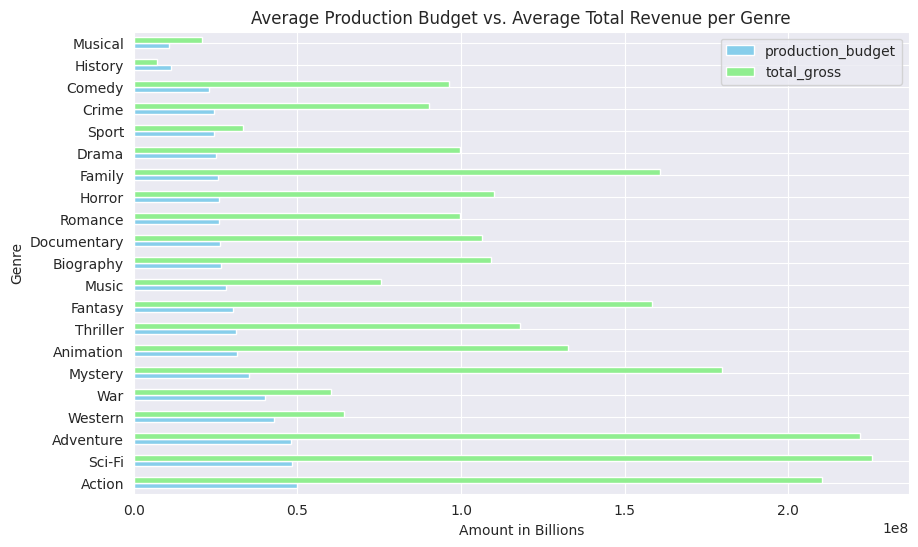

             production_budget   total_gross
genres                                      
Action            5.000189e+07  2.103345e+08
Sci-Fi            4.849569e+07  2.255423e+08
Adventure         4.797422e+07  2.218905e+08
Western           4.300000e+07  6.423682e+07
War               4.000000e+07  6.039821e+07
Mystery           3.528125e+07  1.796644e+08
Animation         3.155678e+07  1.327190e+08
Thriller          3.116089e+07  1.178935e+08
Fantasy           3.024685e+07  1.584504e+08
Music             2.806118e+07  7.559823e+07
Biography         2.666032e+07  1.091810e+08
Documentary       2.624558e+07  1.063287e+08
Romance           2.611377e+07  9.983181e+07
Horror            2.608579e+07  1.100172e+08
Family            2.571429e+07  1.607511e+08
Drama             2.498188e+07  9.980967e+07
Sport             2.450000e+07  3.339406e+07
Crime             2.445177e+07  9.006015e+07
Comedy            2.293054e+07  9.634678e+07
History           1.125000e+07  7.141844e+06
Musical   

In [443]:
# Budget vs. Revenue Analysis:
# Compares how budgets relate to earnings.
# Group by genre and calculate the mean production_budget and total_gross (revenue)
budget_vs_revenue = movie_df.groupby('genres')[['production_budget', 'total_gross']].mean()

# Sort the DataFrame by production_budget
budget_vs_revenue_sorted = budget_vs_revenue.sort_values(by='production_budget', ascending=False)

# Plotting the budget vs revenue for each genre
fig, ax = plt.subplots(figsize=(10, 6))

# Bar plot for production_budget and total_gross
budget_vs_revenue_sorted.plot(kind='barh', ax=ax, color=['skyblue', 'lightgreen'])

# Adding title and labels
plt.title('Average Production Budget vs. Average Total Revenue per Genre')
plt.xlabel('Amount in Billions')
plt.ylabel('Genre')

plt.show()

# Print the sorted budget vs revenue
print(budget_vs_revenue_sorted)


The plot  is similar to the will help you visually assess which genres typically have higher production budgets compared to their corresponding average revenues.

If the total_gross (revenue) is relatively high for genres with high production_budget, it indicates that those genres are more likely to earn significant returns. However, if revenue is low despite high production budgets, it signals less efficient profitability.

**Genres with High Budget vs Low Revenue:** genres like History, have high production budgets but low revenue, suggesting these genres might not be delivering the returns expected. This could indicate inefficiency or an issue with market reception.

Genres with **Low Budget vs High Revenue**: If a genre has a low production budget but high revenue, it indicates that the genre has a higher ROI, making it a more cost-effective investment.

Profitability vs Investment: This analysis helps identify which genres are most profitable relative to their production costs and which might need better management in terms of budgeting and marketing.

In [445]:
#pearson correlation between Budget and  Revenue Analysis:

movie_df[['production_budget', 'total_gross']].corr().iloc[0, 1]


0.7205813698841211

Correlation coefficient of 0.72 indicates a strong correlation between Production Budget and Total gross

In [465]:
# Calculate profit as total_gross - production_budget
movie_df['profit'] = (movie_df['total_gross'] - movie_df['production_budget']).astype(int)

# Group by genre and calculate the total profit per genre
profit_by_genre = movie_df.groupby('genres')['profit'].sum()

# Sort the DataFrame by profit in descending order
profit_by_genre_sorted = profit_by_genre.sort_values(ascending=False)

# Display the table
print(profit_by_genre_sorted)


genres
Action         211318387932
Drama          197769850728
Adventure       89392965579
Comedy          82226185416
Horror          56989404905
Documentary     46608399271
Biography       31275341159
Crime           29589379369
Thriller         9540589734
Fantasy          8333229822
Animation        7688330313
Sci-Fi           5134350825
Romance          3907056007
Family           3781031385
Mystery          3465195725
Music             808129907
Western            42473636
Musical            29993180
War                20398210
Sport              17788124
History            -8216312
Name: profit, dtype: int64


 # Modelling the relationship between Production Budget and Total Gross Revenue

In [446]:
from sklearn.linear_model import LinearRegression

# Define the independent and dependent variables
X = movie_df[['production_budget']]  # Independent variable (budget)
y = movie_df['total_gross']  # Dependent variable (revenue)

# Initialize and fit the model
model = LinearRegression()
model.fit(X, y)

# Get the R² score (Goodness of fit)
r_squared = model.score(X, y)

# Get the coefficient (how budget affects total revenue)
coefficient = model.coef_[0]

# Intercept (the base revenue when the budget is zero)
intercept = model.intercept_

# Display the results
print(f"R² Score: {r_squared:.2f}")
print(f"Coefficient: {coefficient:.2f}")
print(f"Intercept: {intercept:.2f}")


R² Score: 0.52
Coefficient: 4.14
Intercept: 596003.20


**R² = 0.52:** This means that 52% of the variance in the total revenue can be explained by the production budget. This is a moderate positive correlation, indicating that production budget plays a significant role in determining the total gross, but other factors also contribute to total revenue.
Interpretation: While the production budget is an important factor, other variables (e.g., genre, marketing, audience reception) also influence the total gross. The model isn't perfect, but it gives a reasonable prediction.
Coefficient:

**Coefficient = 7.83:** For every 1 increase in the production budget, we can expect the Total Gross Revenue to increase by **$7.83** on average.

**Interpretation:** This means that there is a positive relationship between the budget and the total gross, where movies with larger production budgets tend to earn significantly higher total revenue. However, the scale of increase is substantial (more than 7x the budget), which might point to high-earning blockbuster films.
Intercept:

**Intercept = 1.20e+06:(1,200,000)** This represents the base revenue ( 1.2 million dollars) when the production budget is zero. This value represents the estimated total gross revenue for a movie with a zero production budget. It doesn't necessarily reflect any real-world movie since all movies have a budget, but it serves as the baseline in the linear model.

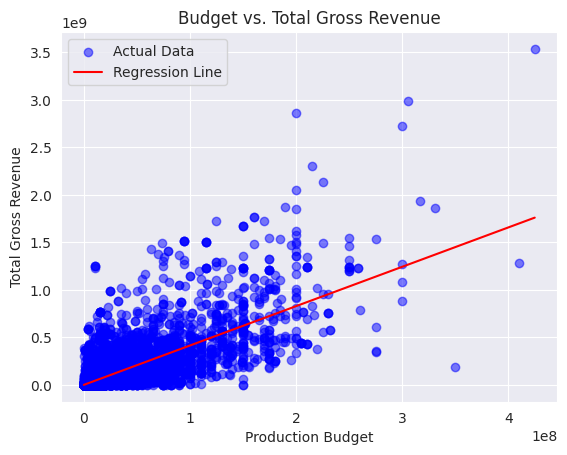

In [447]:
#visualizing the model

# Plot the actual data points
plt.scatter(X, y, color='blue', alpha=0.5, label='Actual Data')

# Plot the regression line
plt.plot(X, model.predict(X), color='red', label='Regression Line')

# Labels and title
plt.xlabel('Production Budget')
plt.ylabel('Total Gross Revenue')
plt.title('Budget vs. Total Gross Revenue')

# Display legend
plt.legend()

# Show plot
plt.show()


 4. Audience & Ratings Metrics

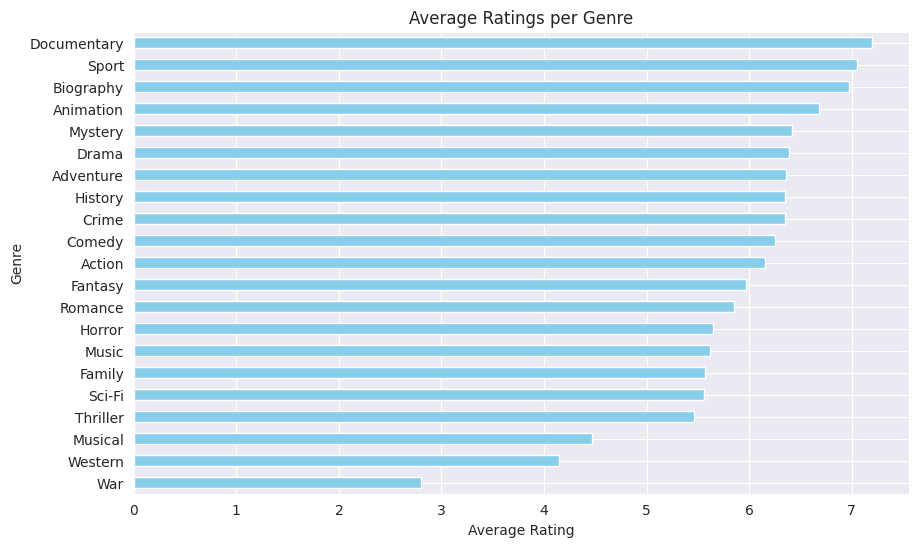

In [438]:
# Average Ratings per Genre
# Measures audience satisfaction.
# Ensure 'averagerating' is a float
movie_df['averagerating'] = movie_df['averagerating'].astype(float)

# Group by 'genre' and calculate the average rating for each genre
avg_ratings_per_genre = movie_df.groupby('genres')['averagerating'].mean().sort_values()

# Plotting
avg_ratings_per_genre.plot(kind='barh', color='skyblue', figsize=(10, 6))
plt.title('Average Ratings per Genre')
plt.xlabel('Average Rating')
plt.ylabel('Genre')
plt.show()



# Multivariate Analysis

A. Correlation Matrix

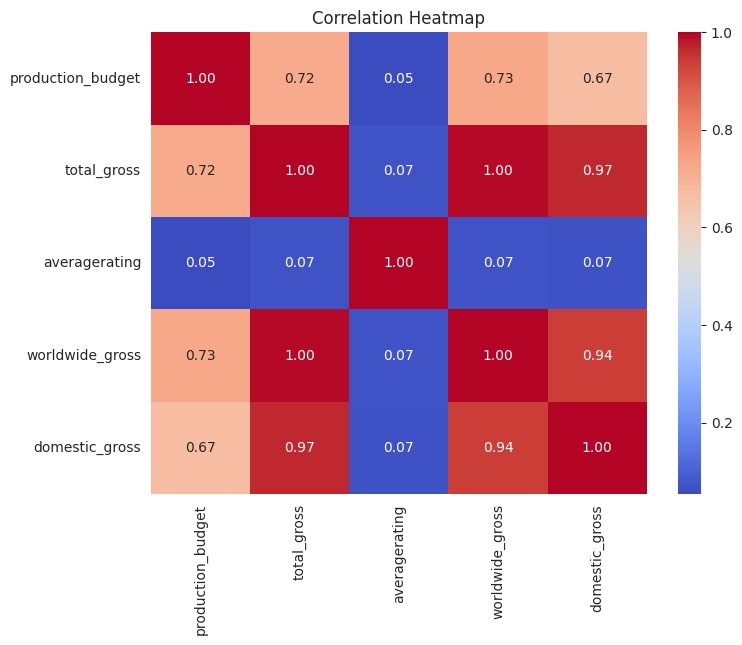

In [431]:
# Which variables are strongly related?
corr_matrix = movie_df[['production_budget', 'total_gross', 'averagerating', 'worldwide_gross', 'domestic_gross']].corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


High correlations indicate strong relationships.
Key Variables:
Production Budget vs. Box Office:

**Production Budget and Total Gross (0.72)**:

There is a strong positive correlation, indicating that higher budgets often result in higher revenues. This suggests that high-performing genres may require significant investment.

**Production Budget and Worldwide Gross (0.73)**:

A similar strong correlation exists globally, emphasizing the importance of budget.
Revenue Relationships:

**Total Gross, Worldwide Gross, and Domestic Gross:**

These are very strongly correlated (close to 1.00). This means that successful genres perform well across domestic and international markets.
Average Rating (IMDb) vs. Revenue:

The correlations between average rating and all revenue variables are very low (around 0.07). This suggests that while ratings might influence a movie's reputation, they are not strong indicators of box office success. Genre-specific box office strategies might outweigh critical acclaim.

B. Multiple Regression (Predicting Revenue)

In [432]:
# Can we predict box office success?
from sklearn.linear_model import LinearRegression

X = movie_df[['production_budget', 'averagerating']]
y = movie_df['total_gross']

model = LinearRegression()
model.fit(X, y)

print(f"R² Score: {model.score(X, y):.2f}")
print(f"Coefficients: {model.coef_}")


R² Score: 0.52
Coefficients: [4.13179006e+00 6.27939503e+06]


**R² = 0.52** - means that 52% of the variance in the total gross revenue (total_gross) can be explained by the model, which uses production budget (production_budget) and average rating (averagerating) as predictors. This suggests that the combination of these two features provides a moderate fit to the data. In other words, 52% of the variability in box office revenue can be attributed to changes in these two variables, while the remaining 48% might be due to other factors not included in the model (such as marketing, actors, etc.).

**Coefficients:**
The coefficients tell you how much the predicted value of the target variable (total_gross) will change for a one-unit increase in the predictor variables (production_budget and averagerating), assuming all other variables stay constant.
Here the breakdown of the coefficients:

**Production Budget Coefficient = 4.13**:

This means that **for every 1 unit increase in the production budget, the total revenue is expected to increase by 4.13 units**. This suggests that **the production budget has a positive relationship with box office revenue, meaning higher budgets tend to correlate with higher revenue**.

**Average Rating Coefficient = 6,279,395.03:**

This means that **for every 1 point increase in the average rating, the total revenue is expected to increase by approximately 6.28 million dollars.** So, higher ratings significantly influence the box office revenue, but this is a very large number, indicating that ratings have a strong impact on revenue in the context of this model.






C. Clustering Movies by Success.

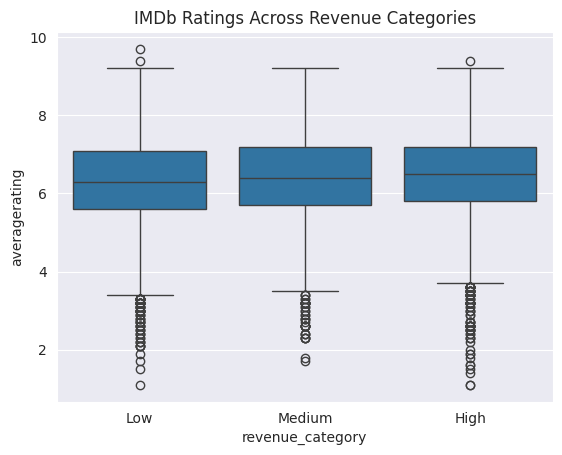

In [435]:
# Grouping movies into high, medium, and low performers
movie_df['revenue_category'] = pd.qcut(movie_df['total_gross'], q=3, labels=['Low', 'Medium', 'High'])

sns.boxplot(x=movie_df['revenue_category'], y=movie_df['averagerating'])
plt.title("IMDb Ratings Across Revenue Categories")
plt.show()


This boxplot visualizes the distribution of ratings across three revenue categories (Low, Medium, High). The categories were created by dividing the movies into equal-sized groups based on their total gross revenue using quantile-based binning.

Similar Median Ratings:

The median  ratings for movies across all revenue categories (Low, Medium, High) are similar, hovering around 6. This suggests that higher revenue is not necessarily linked to higher ratings.

Spread of Ratings:

The interquartile range (IQR), which represents the middle 50% of ratings, is consistent across all categories. This indicates that the variability of ratings within each category is similar.

Outliers:

All categories include outliers with very low ratings (below 3) and very high ratings (above 8). Even high-grossing movies can have low ratings, and low-grossing movies can be critically acclaimed.

**Relevance to Your Objective (Clustering Movies by Success and Genre Analysis)**:

**High Revenue, Diverse Ratings:**

The high revenue category includes movies with both average and exceptional ratings, likely reflecting genres with broad appeal (e.g., action, animation) rather than niche critical darlings.

**Low Revenue, High Ratings:**

Some movies in the low revenue category achieve high ratings, potentially pointing to genres like drama or indie films that are critically acclaimed but not commercially successful.

**Genre Insight:**

High-grossing genres might not necessarily align with high-rated genres. This suggests focusing on genres with high revenue potential (like blockbusters) while balancing critical acclaim.


# RECOMMENDATIONS


1. Invest in High-Median Revenue Genres

Focus on Action, Adventure, and Sci-Fi: These genres have the highest median revenues, indicating consistent box office success.
Recommendation: Allocate more resources to develop and market films within these genres, ensuring high production values and engaging storylines to attract larger audiences.
2. Optimize Production Budgets for Maximum ROI

Correlation Between Budget and Revenue: There is a strong positive correlation between production budgets and total revenue.
Recommendation: Ensure that high-budget films are strategically planned with robust marketing campaigns. Consider the diminishing returns at very high budgets and aim for a balanced investment that maximizes profitability.
3. Explore Genre Combinations for Broader Appeal

Trends in Genre Blending: Combining genres can attract diverse audiences and enhance box office performance.
Recommendation: Develop films that blend popular genres (e.g., Sci-Fi Adventure) to leverage the strengths of both genres and appeal to a wider demographic, increasing the potential for box office success.
4. Monitor and Adjust Based on ROI Metrics

Evaluate Worldwide and Box Office ROI: Understanding both metrics provides insights into immediate and long-term profitability.
Recommendation: For genres with low or negative ROI (e.g., Musical, War), reassess production strategies and consider reducing investment. Focus on genres with high ROI, such as Adventure and Horror, for future projects to ensure sustainable profitability.
5. Prioritize High-Performing Genres for Future Productions

Action, Adventure, and Horror: These genres show strong box office performance and high average revenues.
Recommendation: Strategically prioritize these genres in future production schedules to capitalize on their proven market success and maximize returns.
Conclusion
By implementing these recommendations, studios can strategically align their production efforts with market trends, optimize profitability, and enhance box office performance across various genres.